<a href="https://colab.research.google.com/github/Thasan112/Height_weight_ML/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
df=pd.read_csv('/height-weight.csv')

In [57]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

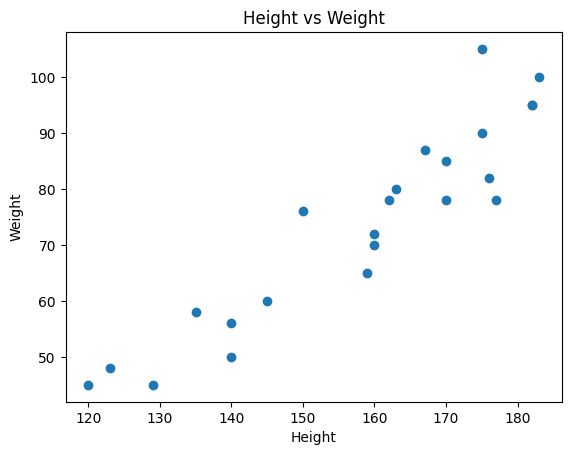

In [58]:

plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title("Height vs Weight")

In [59]:
#correalation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


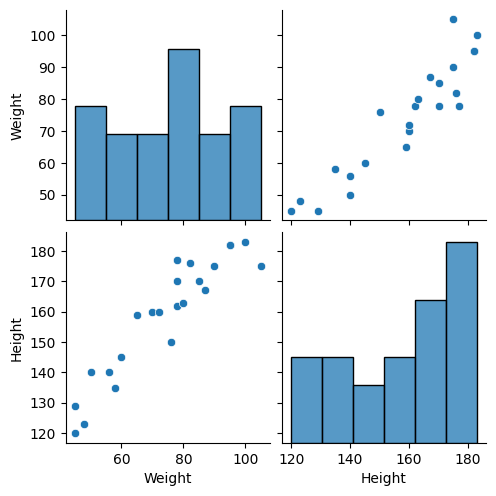

In [60]:
#Seaborn for visualisation #linear regression
import seaborn as sns
sns.pairplot(df)

In [61]:
#Independent and dependent features
X=df[['Weight']] #independent feature should always be in 2D-array
np.array(X).shape
Y=df['Height'] # This dependent feature is in series

Train- Test split

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [63]:
X_train.shape

(18, 1)

Standardisation

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Import and Apply Linear regression

In [65]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [66]:
print("Coefficient or slope is:", lr.coef_)  # Coefficient or Beta1 of the linear equation
print("Intercept is:", lr.intercept_)  # Intercept  of the linear equation

Coefficient or slope is: [16.92653463]
Intercept is: 158.11111111111111


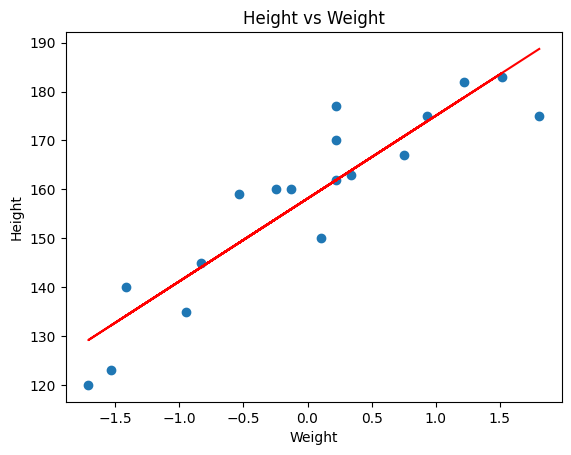

In [67]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,lr.predict(X_train),color='red')
plt.title("Height vs Weight")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()


# Prediction for Test Data

#Prediction of Test Data
predicted height output=intercept+coeff_*Weight
Y_pred=lr.intercept_+lr.coef_*X_test
Y_pred=16.92653463+158.11111111111111

In [68]:
Y_Prediction =lr.predict(X_test)

Performance Matrix

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_Prediction)
mae=mean_absolute_error(Y_test,Y_Prediction)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 22.795111961354205
Mean Absolute Error: 2.943216949404291
Root Mean Squared Error: 4.774422683566486


R squared

R2=1-RSS/TSS

In [70]:
from sklearn.metrics import r2_score
score =r2_score(Y_test,Y_Prediction)
print("R2 Score:",score)

R2 Score: 0.9481740815720394


Adjusted R -suared

Adjusted R² = 1 - [ ( (1 - R²) * (n - 1) ) / (n - k - 1) ]

In [71]:
adjusted_r2 = 1 - ((1 - score) * (len(Y_test) - 1)) / (len(Y_test) - X_test.shape[1] - 1)
print("Adjusted R2 Score:", adjusted_r2)


Adjusted R2 Score: 0.9308987754293859


OLS(ordinary Least square)

In [72]:
from statsmodels.api import OLS

In [73]:
model=OLS(Y_train,X_train).fit()

In [74]:
from statsmodels.api import OLS

In [75]:
model=OLS(Y_train,X_train).fit()

In [76]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1944
Date:                Sun, 10 Aug 2025   Prob (F-statistic):                       0.665
Time:                        23:57:27   Log-Likelihood:                         -116.70
No. Observations:                  18   AIC:                                      235.4
Df Residuals:                      17   BIC:                                      236.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Prediction for new Data


In [80]:
lr.predict(sc.transform([[72]]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.96092598])